In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json
import re
import numpy as np
import pickle
import fasttext.util
import torch
from sklearn.manifold import TSNE
import plotly.express as px
from random import sample
import seaborn as sns



## Author Latent Model
Finally, let's analyze the results of the general, Latent BTM model. In the first part we wish to see the general scores for the words based on the learned weights of the model.

In [2]:
# load the dictionarly of words properly embedded with fasttext model
word_dict = pd.read_pickle('data/bigram.pkl.bz2',compression='bz2')
word_dict.head(3)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,frequency
"(the, business)",-0.034616,0.047232,-0.006303,0.049580,-0.037124,0.042071,0.037814,-0.002660,-0.001415,0.005219,...,-0.017859,-0.035677,0.026899,-0.038411,-0.027634,-0.020967,0.142222,-0.010705,0.003219,5564
"(business, of)",-0.008780,-0.083620,-0.035300,-0.204408,-0.019865,0.037216,0.004973,0.034216,-0.006140,0.004440,...,0.002437,-0.061937,0.120499,-0.064099,-0.018699,-0.008504,0.037941,-0.080145,0.014343,1149
"(of, businesses)",-0.030593,-0.096034,-0.041795,-0.220057,-0.017181,0.040795,-0.013028,0.039685,-0.002545,-0.013907,...,0.019236,-0.053693,0.131681,-0.072086,-0.025792,0.008592,0.031430,-0.045575,0.029365,1043


In [3]:
# load the dictionarly of words properly embedded with fasttext model
bigram_dict = pd.read_pickle('data/bigram.pkl.bz2',compression='bz2')
bigram_dict.head(3)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,frequency
"(the, business)",-0.034616,0.047232,-0.006303,0.049580,-0.037124,0.042071,0.037814,-0.002660,-0.001415,0.005219,...,-0.017859,-0.035677,0.026899,-0.038411,-0.027634,-0.020967,0.142222,-0.010705,0.003219,5564
"(business, of)",-0.008780,-0.083620,-0.035300,-0.204408,-0.019865,0.037216,0.004973,0.034216,-0.006140,0.004440,...,0.002437,-0.061937,0.120499,-0.064099,-0.018699,-0.008504,0.037941,-0.080145,0.014343,1149
"(of, businesses)",-0.030593,-0.096034,-0.041795,-0.220057,-0.017181,0.040795,-0.013028,0.039685,-0.002545,-0.013907,...,0.019236,-0.053693,0.131681,-0.072086,-0.025792,0.008592,0.031430,-0.045575,0.029365,1043


In [4]:
# load the author embeddings necessary for the model
with open("data/authors_weights.pickle", "rb") as file:
    author_embeddings = pickle.load(file)
    
author_embeddings = pd.DataFrame.from_dict(author_embeddings, orient='index')
author_embeddings.head(3)

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
22,-0.011832,0.000088,0.004434,0.038730,-0.047330,0.003657,0.012779,0.003983,-0.000961,-0.002555,...,0.014677,0.010975,0.123918,-0.006615,0.011359,0.923077,0.0,0.0,0.0,0.384615
224,-0.026187,-0.029001,0.015409,0.040204,-0.054712,-0.013778,0.028484,-0.008869,0.016860,-0.007510,...,0.013030,0.019806,0.111667,-0.002293,0.005656,0.550000,0.0,0.0,0.0,0.450000
246,-0.021350,-0.006799,0.015069,0.035720,-0.034636,-0.010558,0.014174,0.001210,0.000823,-0.000146,...,0.010463,0.003462,0.091501,-0.001289,0.010120,0.600000,0.0,0.0,0.0,0.600000


## T-SNE

In [ ]:
X_embedded = TSNE(n_components=3, learning_rate='auto', perplexity=40).fit_transform(author_embeddings)
df_TSNE = pd.DataFrame(X_embedded)
df_TSNE['author'] = author_embeddings.index
df_TSNE['index'] = df_TSNE.index
df_TSNE.to_csv('Models/TSNEresult.csv')
df_TSNE.head()

In [5]:
df_TSNE = pd.read_csv('Models/TSNEresult.csv',index_col=0)
df_TSNE.head()

,0,1,2,author,index
0,8.251533,2.838324,12.960337,22,0
1,0.091270,-10.819440,19.992016,224,1
2,6.149355,-8.551378,14.664890,246,2
3,-0.522316,18.622406,-11.415726,985,3
4,15.233815,5.859272,8.442491,989,4


<AxesSubplot:xlabel='0', ylabel='1'>

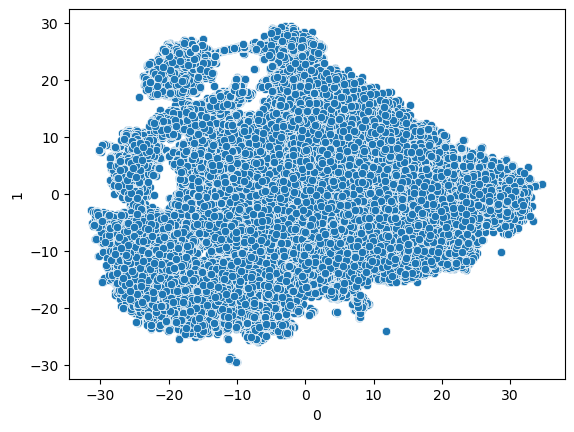

In [7]:
sns.scatterplot(data=df_TSNE, x='0', y='1')

  0%|          | 0/18 [00:00<?, ?it/s]

Text(0, 0.5, 'Sum of Squared Errors')

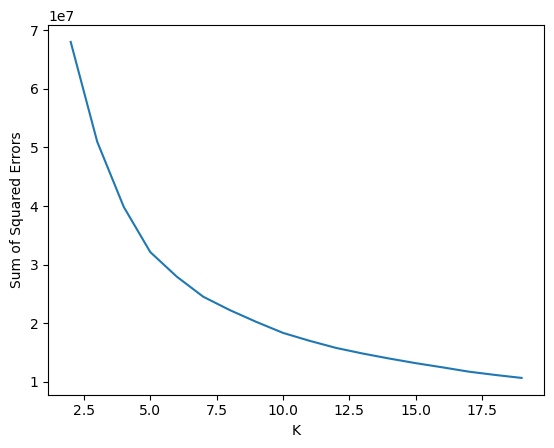

In [8]:
from sklearn.cluster import KMeans

sse = [] 
X = df_TSNE[['0','1','2']].to_numpy()
# Try multiple k
for k in tqdm(range(2, 20)):
    # Cluster the data and assigne the labels
    kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
    sse.append({"k": k, "sse": kmeans.inertia_})

sse = pd.DataFrame(sse)
# Plot the data
plt.plot(sse.k, sse.sse)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")

In [9]:
labels = KMeans(n_clusters=7, random_state=10).fit_predict(X)
labels.shape

(209309,)

In [10]:
df_TSNE["Cluster"] = labels
df_TSNE.head()

,0,1,2,author,index,Cluster
0,8.251533,2.838324,12.960337,22,0,5
1,0.091270,-10.819440,19.992016,224,1,1
2,6.149355,-8.551378,14.664890,246,2,1
3,-0.522316,18.622406,-11.415726,985,3,2
4,15.233815,5.859272,8.442491,989,4,5


<AxesSubplot:xlabel='0', ylabel='1'>

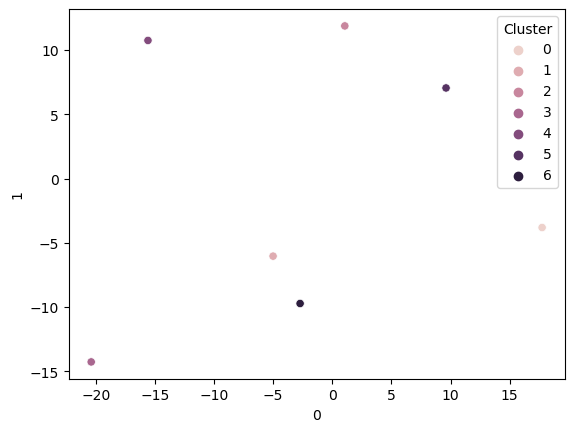

In [11]:
avg_cluster = df_TSNE[['0','1','2','Cluster']].groupby('Cluster').mean()
avg_cluster['Cluster'] = avg_cluster.index

sns.scatterplot(data=avg_cluster, x='0', y='1',hue='Cluster')

<AxesSubplot:xlabel='0', ylabel='1'>

/home/indy-stg2/mlteam1/miniconda3/envs/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



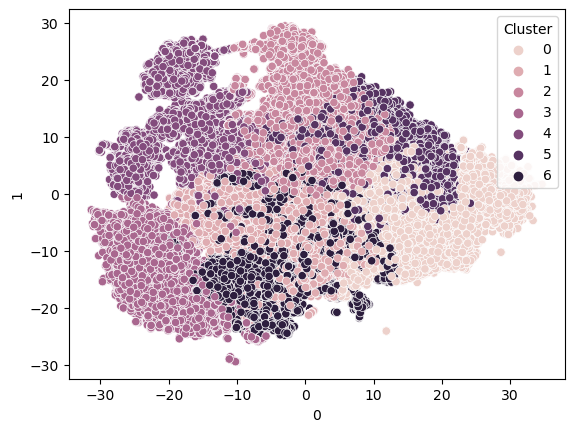

In [12]:
sns.scatterplot(data=df_TSNE, x='0', y='1',hue='Cluster')



Here we pick 4 authors that are furthest away from the center and each other (4 corner of our graph), assuming they write completly opposite tweets and to completly different audiences. 

In [13]:
author_embeddings["Cluster"] = labels
author_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,Cluster
22,-0.011832,0.000088,0.004434,0.038730,-0.047330,0.003657,0.012779,0.003983,-0.000961,-0.002555,...,0.010975,0.123918,-0.006615,0.011359,0.923077,0.000000,0.0,0.0,0.384615,5
224,-0.026187,-0.029001,0.015409,0.040204,-0.054712,-0.013778,0.028484,-0.008869,0.016860,-0.007510,...,0.019806,0.111667,-0.002293,0.005656,0.550000,0.000000,0.0,0.0,0.450000,1
246,-0.021350,-0.006799,0.015069,0.035720,-0.034636,-0.010558,0.014174,0.001210,0.000823,-0.000146,...,0.003462,0.091501,-0.001289,0.010120,0.600000,0.000000,0.0,0.0,0.600000,1
985,-0.026778,-0.007398,-0.000153,0.027064,-0.040457,0.002891,0.028420,0.028276,0.006746,0.006383,...,0.019486,0.110385,0.001277,0.013667,1.000000,0.888889,0.0,0.0,0.222222,2
989,-0.008732,-0.005052,-0.001882,0.025752,-0.028201,0.004804,0.020816,0.001998,-0.005596,-0.007725,...,-0.001252,0.130954,-0.010536,0.012593,1.000000,0.100000,0.0,0.0,0.400000,5


In [14]:
avg_author_embeddings = author_embeddings.groupby('Cluster').mean().iloc[:,:300]
avg_author_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.019198,-0.003137,0.005437,0.035984,-0.037094,-0.003531,0.019041,0.003830,0.004567,-0.002513,...,0.028497,0.004536,-0.088520,0.017371,-0.008641,0.008119,0.003205,0.111508,-0.002396,0.008881
1,-0.014804,-0.012550,0.005972,0.045159,-0.049245,-0.012947,0.013532,-0.004151,0.008026,0.000287,...,0.032076,0.005669,-0.105886,0.013677,-0.005975,0.013502,0.010363,0.124185,-0.006088,0.007343
2,-0.020891,-0.004141,0.006184,0.036284,-0.039698,-0.003850,0.017480,0.004567,0.003636,-0.004770,...,0.030985,0.005193,-0.086994,0.015559,-0.008355,0.009170,0.003736,0.109643,-0.001343,0.009266
3,-0.013997,-0.017053,0.007628,0.047099,-0.054362,-0.016734,0.010859,-0.005374,0.009383,-0.000494,...,0.033417,0.006357,-0.110194,0.012683,-0.006317,0.016065,0.012336,0.128358,-0.008747,0.005797
4,-0.019436,-0.009637,0.007549,0.039293,-0.048404,-0.010453,0.014331,0.000961,0.005011,-0.004046,...,0.030309,0.006300,-0.095132,0.012677,-0.008825,0.010225,0.007092,0.118332,-0.004660,0.007835


In [16]:
class BTMlatent(torch.nn.Module):
    def __init__(self, input_dim):
        super(BTMlatent, self).__init__()
        self.input_dim = input_dim
        self.latentW = torch.nn.Linear(input_dim, input_dim, bias=False)
        self.non_latentW = torch.nn.Linear(input_dim, 1, bias=False)
    
    def forward(self, x, ids, device="cpu"):
        author_embd = torch.from_numpy(author_embeddings.loc[ids].to_numpy()).to(device)
        return self.non_latentW(x) + (author_embd * self.latentW(x)).sum(dim=1, keepdim=True)
    
model_latent = BTMlatent(305)
model_latent.load_state_dict(torch.load("Models/btm-latent-time10%.pth"))

model_latent.eval()

params = []
for p in model_latent.parameters():
    p.requires_grad = False
    if p.shape[0] > 1:
        # weights for embeddings
        weights = p[:300, :300]
        params.append(weights)
        
    else:
        # weights for embeddings
        weights = p[:, :300]
        params.append(weights)
        print("Meta features:", "urls_count", "hashtags_count", "animated_gif_count", "video_count", "image")

        # weights for metadata
        print(p[0, 300:])

Meta features: urls_count hashtags_count animated_gif_count video_count image
tensor([-0.0103, -0.0013, -0.0067,  0.0018,  0.0176])


In [17]:
params_cuda = []
for p in params:
    params_cuda.append(p.to("cuda"))
    
words = torch.from_numpy(word_dict.iloc[:, :300].to_numpy()).to("cuda")

In [18]:
audience_words = {}
for index, row in avg_author_embeddings.iterrows():
    author_embd = torch.from_numpy(row.to_numpy()).to("cuda")
    scores = (words @ params_cuda[1].T + (
        author_embd * (words @ params_cuda[0].T)).sum(
        axis=1, keepdim=True)).to("cpu").numpy().squeeze(1)
    coln = 'cluster'+ str(index)
    word_dict[coln] = scores
    
word_dict.head()

,0,1,2,3,4,5,6,7,8,9,...,298,299,frequency,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6
"(the, business)",-0.034616,0.047232,-0.006303,0.049580,-0.037124,0.042071,0.037814,-0.002660,-0.001415,0.005219,...,-0.010705,0.003219,5564,-0.490938,-0.519148,-0.350202,-0.399714,-0.382937,-0.355117,-0.461530
"(business, of)",-0.008780,-0.083620,-0.035300,-0.204408,-0.019865,0.037216,0.004973,0.034216,-0.006140,0.004440,...,-0.080145,0.014343,1149,-0.583929,0.235772,-0.369808,0.546574,-0.048720,-0.333128,-0.583725
"(of, businesses)",-0.030593,-0.096034,-0.041795,-0.220057,-0.017181,0.040795,-0.013028,0.039685,-0.002545,-0.013907,...,-0.045575,0.029365,1043,-0.883167,-0.155844,-0.669390,0.125672,-0.422767,-0.618777,-0.878107
"(businesses, is)",-0.079436,-0.106300,-0.058131,0.003559,-0.137406,0.012596,0.017852,0.060473,-0.008975,-0.037345,...,-0.088577,0.064825,161,-0.894056,-0.714084,-0.638230,-0.600499,-0.559373,-0.534319,-0.965162
"(is, climate)",-0.079481,-0.126187,-0.025456,0.006256,-0.124971,-0.048428,0.064270,0.075826,-0.008035,-0.026921,...,-0.061457,0.047905,33796,-0.131167,-0.272033,0.086372,-0.156707,0.144706,0.186168,-0.203752


In [19]:
word_dict_freq = word_dict[(word_dict['frequency'] > 700) & (word_dict['frequency'] < 0.7e7)]
np.array(word_dict_freq.sort_values(by='cluster0', ascending=False).index)[0:50]

array([('ha', 'ha'), ('in', 'dc'), ('washington', 'dc'), ('50', '50'),
       ('50', '70'), ('kg', 'dew'), ('50', 'per'), ('my', 'mp'),
       ('3g', 'kg'), ('50', '000'), ('60', '000'), ('40', '000'),
       ('burn', 'ban'), ('uv', 'solarrad'), ('10', 'yrs'),
       ('50', 'years'), ('60', 'years'), ('40', 'years'), ('tory', 'mp'),
       ('70', '000'), ('your', 'mp'), ('than', '50'), ('50', 'billion'),
       ('mp', 'and'), ('mp', 'to'), ('ban', 'all'), ('20', '30'),
       ('50', 'million'), ('world', '60'), ('than', '60'), ('than', '40'),
       ('40', 'billion'), ('for', '50'), ('50', 'for'), ('50', 'in'),
       ('in', '50'), ('for', 'ban'), ('ban', 'in'), ('400', '000'),
       ('ban', 'fossil'), ('10', '20'), ('nearly', '50'), ('will', 'ban'),
       ('50', 'year'), ('10', '30'), ('50', 'degrees'), ('in', 'bc'),
       ('mp', 'please'), ('60', 'million'), ('40', 'million')],
      dtype=object)

In [20]:
np.array(word_dict_freq.sort_values(by='cluster1', ascending=False).index)[0:50]

array([('kg', 'dew'), ('in', 'dc'), ('washington', 'dc'), ('ha', 'ha'),
       ('yrs', 'ago'), ('50', '50'), ('50', '70'), ('uv', 'solarrad'),
       ('10', 'yrs'), ('60', 'years'), ('00', '00'), ('60', '000'),
       ('40', 'years'), ('50', 'per'), ('in', 'bc'), ('40', '000'),
       ('co', 'uk'), ('lt', 'lt'), ('50', 'years'), ('70', 'years'),
       ('35', 'years'), ('bc', 'of'), ('40', 'billion'), ('than', '60'),
       ('85', 'nylon'), ('50', '000'), ('in', '1kg'), ('in', '60'),
       ('70', '000'), ('20', '30'), ('85', 'of'), ('star', 'star'),
       ('60', 'million'), ('burn', 'ban'), ('bc', 'they'), ('10', '00'),
       ('95', 'of'), ('than', '40'), ('bc', 'it'), ('my', 'mp'),
       ('60', 'degrees'), ('in', '40'), ('50', 'billion'), ('1kg', 'of'),
       ('bc', 'to'), ('60', 'of'), ('tory', 'mp'), ('over', '60'),
       ('40', 'million'), ('10', '30')], dtype=object)

In [21]:
np.array(word_dict_freq.sort_values(by='cluster2', ascending=False).index)[0:50]

array([('ha', 'ha'), ('in', 'dc'), ('washington', 'dc'), ('50', '50'),
       ('kg', 'dew'), ('50', '70'), ('50', 'per'), ('3g', 'kg'),
       ('burn', 'ban'), ('my', 'mp'), ('50', '000'), ('40', '000'),
       ('60', '000'), ('uv', 'solarrad'), ('10', 'yrs'), ('50', 'years'),
       ('40', 'years'), ('60', 'years'), ('tory', 'mp'), ('70', '000'),
       ('50', 'billion'), ('than', '50'), ('ban', 'all'), ('your', 'mp'),
       ('20', '30'), ('mp', 'and'), ('mp', 'to'), ('40', 'billion'),
       ('ban', 'in'), ('than', '40'), ('than', '60'), ('50', 'million'),
       ('world', '60'), ('10', '30'), ('in', '50'), ('50', 'in'),
       ('for', 'ban'), ('10', '20'), ('will', 'ban'), ('in', 'bc'),
       ('400', '000'), ('ban', 'fossil'), ('ban', 'on'), ('50', 'for'),
       ('for', '50'), ('50', 'year'), ('40', 'million'), ('in', '40'),
       ('50', 'degrees'), ('60', 'million')], dtype=object)

In [22]:
np.array(word_dict_freq.sort_values(by='cluster3', ascending=False).index)[0:50]

array([('kg', 'dew'), ('in', 'dc'), ('washington', 'dc'), ('yrs', 'ago'),
       ('10', 'yrs'), ('uv', 'solarrad'), ('ha', 'ha'), ('00', '00'),
       ('50', '70'), ('60', 'years'), ('co', 'uk'), ('50', '50'),
       ('star', 'star'), ('lt', 'lt'), ('in', 'bc'), ('40', 'years'),
       ('in', '1kg'), ('95', 'of'), ('60', '000'), ('bc', 'of'),
       ('35', 'years'), ('70', 'years'), ('85', 'of'), ('1kg', 'of'),
       ('85', 'nylon'), ('50', 'per'), ('in', '60'), ('sun', 'sun'),
       ('40', '000'), ('moon', 'orbit'), ('40', 'billion'),
       ('50', 'years'), ('00', 'am'), ('than', '60'), ('10', '00'),
       ('burn', 'ban'), ('bc', 'they'), ('in', '40'), ('20', '30'),
       ('bc', 'it'), ('manchin', 'va'), ('30', 'years'),
       ('60', 'million'), ('solar', 'orbit'), ('60', 'of'),
       ('60', 'degrees'), ('200', 'years'), ('than', '40'),
       ('co', 'op26'), ('bc', 'to')], dtype=object)

In [23]:
np.array(word_dict_freq.sort_values(by='cluster4', ascending=False).index)[0:50]

array([('in', 'dc'), ('washington', 'dc'), ('kg', 'dew'), ('ha', 'ha'),
       ('uv', 'solarrad'), ('50', '50'), ('10', 'yrs'), ('burn', 'ban'),
       ('yrs', 'ago'), ('50', '70'), ('3g', 'kg'), ('in', 'bc'),
       ('50', 'per'), ('my', 'mp'), ('in', '1kg'), ('60', 'years'),
       ('40', 'years'), ('60', '000'), ('40', '000'), ('lt', 'lt'),
       ('50', 'years'), ('bc', 'they'), ('change', 'bs'), ('50', '000'),
       ('bc', 'of'), ('is', 'bs'), ('tory', 'mp'), ('ban', 'in'),
       ('bc', 'to'), ('bc', 'it'), ('shri', 'ji'), ('mp', 'and'),
       ('00', '00'), ('40', 'billion'), ('mp', 'to'), ('your', 'mp'),
       ('in', '60'), ('than', '60'), ('85', 'nylon'), ('35', 'years'),
       ('co', 'uk'), ('mass', 'die'), ('ban', 'all'), ('1kg', 'of'),
       ('bc', 'the'), ('the', 'bc'), ('in', '40'), ('than', '40'),
       ('50', 'billion'), ('mp', 'please')], dtype=object)

In [24]:
np.array(word_dict_freq.sort_values(by='cluster5', ascending=False).index)[0:50]

array([('ha', 'ha'), ('in', 'dc'), ('washington', 'dc'), ('50', '50'),
       ('50', '70'), ('kg', 'dew'), ('50', 'per'), ('50', '000'),
       ('40', '000'), ('60', '000'), ('10', 'yrs'), ('uv', 'solarrad'),
       ('burn', 'ban'), ('50', 'years'), ('my', 'mp'), ('3g', 'kg'),
       ('40', 'years'), ('70', '000'), ('60', 'years'), ('20', '30'),
       ('than', '50'), ('50', 'billion'), ('than', '40'), ('than', '60'),
       ('10', '20'), ('world', '60'), ('40', 'billion'), ('in', '50'),
       ('50', 'in'), ('10', '30'), ('50', 'million'), ('for', '50'),
       ('50', 'for'), ('00', '00'), ('50', 'year'), ('ban', 'all'),
       ('tory', 'mp'), ('50', 'degrees'), ('400', '000'),
       ('nearly', '50'), ('in', '40'), ('10', '00'), ('70', 'years'),
       ('in', '60'), ('20', '000'), ('40', 'million'), ('for', '40'),
       ('60', 'million'), ('30', '000'), ('in', 'bc')], dtype=object)

In [25]:
np.array(word_dict_freq.sort_values(by='cluster6', ascending=False).index)[0:50]

array([('ha', 'ha'), ('in', 'dc'), ('washington', 'dc'), ('50', '50'),
       ('kg', 'dew'), ('my', 'mp'), ('3g', 'kg'), ('50', '70'),
       ('burn', 'ban'), ('50', 'per'), ('50', '000'), ('uv', 'solarrad'),
       ('your', 'mp'), ('tory', 'mp'), ('10', 'yrs'), ('mp', 'and'),
       ('60', '000'), ('40', '000'), ('mp', 'to'), ('50', 'years'),
       ('mp', 'please'), ('ban', 'all'), ('ban', 'in'), ('60', 'years'),
       ('will', 'ban'), ('40', 'years'), ('for', 'ban'),
       ('50', 'billion'), ('ban', 'on'), ('than', '50'),
       ('ban', 'fossil'), ('in', '50'), ('50', 'in'), ('in', 'bc'),
       ('70', '000'), ('50', 'million'), ('world', '60'), ('ban', 'and'),
       ('50', 'for'), ('for', '50'), ('20', '30'), ('40', 'billion'),
       ('ban', 'new'), ('to', 'ban'), ('hosepipe', 'ban'), ('than', '60'),
       ('50', 'year'), ('bc', 'they'), ('than', '40'), ('youtube', 'ban')],
      dtype=object)